# SMS Spam Detection

In [1]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [2]:
len(messages)

5574

In [3]:
for messno, msg in enumerate(messages[:20]):
    print(messno, msg)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [4]:
# Organize messages into dataframes using pandas

In [5]:
import pandas as pd

messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names = ['label', 'message'])

messages.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [6]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [8]:
# add a new feature called length that stores length of the message

In [9]:
messages['length'] = messages['message'].apply(len)

messages.head(6)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147


In [10]:
# distribution of message length

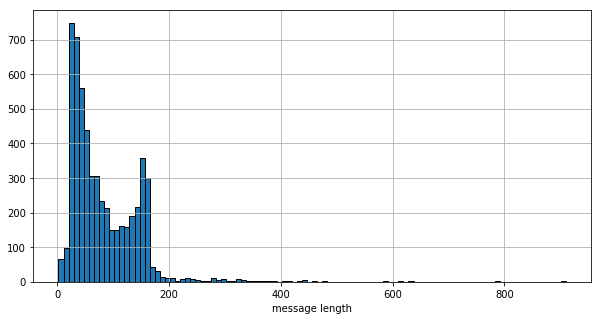

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.xlabel('message length')
messages['length'].hist(bins=100, edgecolor='black', figsize=(10,5))
plt.savefig('output/Histogram1.png')

In [12]:
# plot separate histograms for spam and ham to analyze the difference in distribution

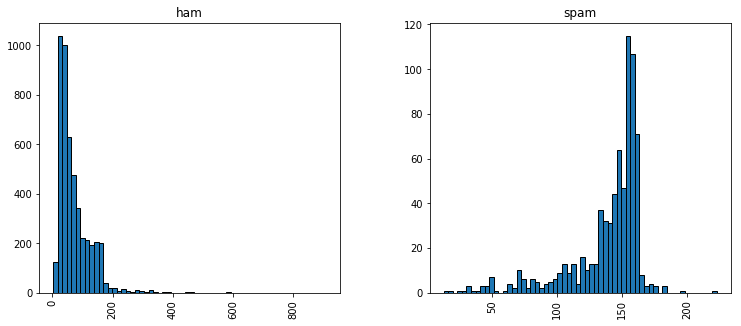

In [13]:
messages.hist(column='length',by='label',bins=60,figsize=(12,5),
              edgecolor='black')
plt.savefig('output/Histogram2.png')

# Text pre-processing

In [14]:
def text_process(data):
    '''
    1. remove punc
    2. do stemming of words
    3. remove stop words
    4. return list of clean text words
    '''
    nopunc = [c for c in data if c not in string.punctuation] #remove punctuations
    nopunc = ''.join(nopunc)
    
    stemmed = ''
    nopunc = nopunc.split()
    for i in nopunc:
        stemmer = SnowballStemmer('english')
        stemmed += (stemmer.stem(i)) + ' ' # stemming of words
        
    clean_msgs = [word for word in stemmed.split() if word.lower() not in stopwords.words('english')] # remove stopwords
    
    return clean_msgs

In [15]:

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import string
nltk.download('stopwords')

def loadData():
    
    messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names = ['label', 'message'])
    messages['length'] = messages['message'].apply(len)
    
    return messages

def text_process(data):
    '''
    1. remove punc
    2. do stemming of words
    3. remove stop words
    4. return list of clean text words
    '''
    nopunc = [c for c in data if c not in string.punctuation] #remove punctuations
    nopunc = ''.join(nopunc)
    
    stemmed = ''
    nopunc = nopunc.split()
    for i in nopunc:
        stemmer = SnowballStemmer('english')
        stemmed += (stemmer.stem(i)) + ' ' # stemming of words
        
    clean_msgs = [word for word in stemmed.split() if word.lower() not in stopwords.words('english')] # remove stopwords
    
    return clean_msgs

def main():
    
    messages = loadData()
    #print(messages)
    messages['processed_msg'] = messages['message'].apply(text_process)
    
    print('\n################################################## Processed Messages ##################################################\n')
    with pd.option_context('expand_frame_repr', False):
        print (messages)
    #print(messages)

    messages.to_csv('output/processed_msgs.csv', encoding='utf-8', index=False) #copy processed messages dataframe to a new csv file

if __name__ == "__main__":
    main()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

################################################## Processed Messages ##################################################

     label                                            message  length                                      processed_msg
0      ham  Go until jurong point, crazy.. Available only ...     111  [go, jurong, point, crazi, avail, onli, bugi, ...
1      ham                      Ok lar... Joking wif u oni...      29                       [ok, lar, joke, wif, u, oni]
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155  [free, entri, 2, wkli, comp, win, fa, cup, fin...
3      ham  U dun say so early hor... U c already then say...      49      [u, dun, say, earli, hor, u, c, alreadi, say]
4      ham  Nah I don't think he goes to usf, he lives aro...      61  [nah, dont, think, goe, usf, live, around

# Vectorization of processed messages & Initial Text Classification


############### SVM ###############

             precision    recall  f1-score   support

        ham       0.88      1.00      0.94      1475
       spam       0.00      0.00      0.00       197

avg / total       0.78      0.88      0.83      1672



C:\Users\Rohan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



############### Decision Tree ###############

             precision    recall  f1-score   support

        ham       0.97      0.98      0.98      1475
       spam       0.84      0.79      0.81       197

avg / total       0.96      0.96      0.96      1672


############### Multinomial NB ###############

             precision    recall  f1-score   support

        ham       0.88      1.00      0.94      1475
       spam       1.00      0.01      0.01       197

avg / total       0.90      0.88      0.83      1672


############### KNN ###############

             precision    recall  f1-score   support

        ham       0.96      0.97      0.96      1475
       spam       0.75      0.68      0.71       197

avg / total       0.93      0.94      0.93      1672


############### Random Forest ###############

             precision    recall  f1-score   support

        ham       0.97      1.00      0.98      1475
       spam       1.00      0.76      0.86       197

avg / total

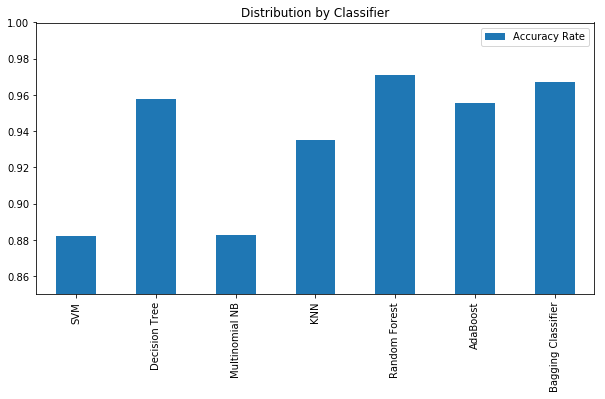

In [16]:

import pickle
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

def Tfidf_Vectorization(messages):
    '''
    1. Convert word tokens from processed msgs dataframe into a bag of words
    2. Convert bag of words representation into tfidf vectorized representation for each message
    '''
    bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])
    bow = bow_transformer.transform(messages['message']) # bag of words

    tfidf_transformer = TfidfTransformer().fit(bow)
    tfidf_vect = tfidf_transformer.transform(bow) # tfidf vector representation
    
    pickle.dump(tfidf_vect, open("output/tfidf_vector.pickle", "wb")) # stores tfidf vector in a pickle file so it could be used later in future scripts
    
    return tfidf_vect

def TrainTestSplit(feature_vect, messages):
    '''
    Split dataset into training and test sets. We use a 70/30 split.
    '''
    X_train, X_test, y_train, y_test = train_test_split(feature_vect, messages['label'], test_size = 0.3, random_state = 101)
    
    return X_train, X_test, y_train, y_test

def train_classifier(classifier, X_train, y_train):
    classifier.fit(X_train, y_train)
    
def predict_labels(classifier, X_test):
    return (classifier.predict(X_test))

def main():
    
    messages = pd.read_csv('output/processed_msgs.csv')

    tfidf_vect = Tfidf_Vectorization(messages)
    
    # append our message length feature to the tfidf vector to produce the final feature vector we fit into our classifiers
    len_feature = messages['length'].as_matrix()
    feat_vect = np.hstack((tfidf_vect.todense(), len_feature[:, None]))
    
    X_train, X_test, y_train, y_test = TrainTestSplit(feat_vect, messages)
    
    svm = SVC()
    dtree = DecisionTreeClassifier()
    mnb = MultinomialNB()
    knn = KNeighborsClassifier()
    rfc = RandomForestClassifier()
    ada_boost = AdaBoostClassifier()
    bagging_clf = BaggingClassifier()
    
    classifiers = {'SVM': svm, 'Decision Tree': dtree, 'Multinomial NB': mnb, 'KNN': knn, 'Random Forest': rfc, 
                   'AdaBoost': ada_boost, 'Bagging Classifier': bagging_clf}
    
    X_train2, X_test2 = train_test_split(messages['message'], test_size = 0.3, random_state = 101)
    pred_scores = []
    pred = dict()
    file = open('output/misclassified_msgs.txt', 'a', encoding='utf-8') # misclassified messages will be written in this
    for k, v in classifiers.items():
        train_classifier(v, X_train, y_train)
        pred[k] = predict_labels(v, X_test)
        pred_scores.append((k, [accuracy_score(y_test, pred[k])]))
        print('\n############### ' + k + ' ###############\n')
        print(classification_report(y_test, pred[k]))

        # write misclassified messages into a new text file
        file.write('\n#################### ' + k + ' ####################\n')
        file.write('\nMisclassified as Spam:\n\n')
        for msg in X_test2[y_test < pred[k]]:
            file.write(msg)
            file.write('\n')
        file.write('\nMisclassified as Ham:\n\n')
        for msg in X_test2[y_test > pred[k]]:
            file.write(msg)
            file.write('\n')
    file.close()

    print('\n############### Accuracy Scores ###############')
    accuracy = pd.DataFrame.from_items(pred_scores, orient = 'index', columns = ['Accuracy Rate'])
    print('\n')
    print(accuracy)
    print('\n')

    #plot accuracy scores in a bar plot
    accuracy.plot(kind =  'bar', ylim=(0.85,1.0), figsize=(10,5))
    plt.title('Distribution by Classifier')
    plt.legend()
    
if __name__ == "__main__":
    main()

# Parameter tuning using grid search

In [17]:

import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

def SVM_Tuning(X_train, X_test, y_train, y_test):

    print('\n############### SVM ###############\n')
    param_grid = {'kernel':['sigmoid','rbf','linear'],'gamma':[1,0.1,0.01]}

    model = GridSearchCV(SVC(), param_grid, verbose = 3)
    model.fit(X_train, y_train)

    print('\nBest parameter:', model.best_params_)

    pred = model.predict(X_test)

    print('\nAccuracy Score:', accuracy_score(y_test, pred))
    print('\n')
    print(classification_report(y_test, pred))

def MNB_Tuning(X_train, X_test, y_train, y_test):

    print('\n############### Multinomial NB ###############\n')
    param_grid = {'alpha': np.arange(0.05, 1.05, 0.05)}

    model = GridSearchCV(MultinomialNB(), param_grid, verbose = 1)
    model.fit(X_train, y_train)

    print('\nBest parameter:', model.best_params_)

    pred = model.predict(X_test)

    print('\nAccuracy Score:', accuracy_score(y_test, pred))
    print('\n')
    print(classification_report(y_test, pred))

def DTree_Tuning(X_train, X_test, y_train, y_test):

    print('\n############### Decision Tree ###############\n')
    param_grid = {'min_samples_split': np.arange(2, 21, 1)}
    
    model = GridSearchCV(DecisionTreeClassifier(), param_grid, verbose = 1)
    model.fit(X_train, y_train)

    print('\nBest parameter:', model.best_params_)

    pred = model.predict(X_test)

    print('\nAccuracy Score:', accuracy_score(y_test, pred))
    print('\n')
    print(classification_report(y_test, pred))

def main():

    tfidf_vect = pickle.load(open("output/tfidf_vector.pickle", "rb"))
    messages = pd.read_csv('output/processed_msgs.csv')
    
    # append our message length feature to the tfidf vector to produce the final feature vector we fit into our classifiers
    len_feature = messages['length'].as_matrix()
    feat_vect = np.hstack((tfidf_vect.todense(), len_feature[:, None]))

    X_train, X_test, y_train, y_test = train_test_split(feat_vect, messages['label'], test_size = 0.3, random_state = 101)

    MNB_Tuning(X_train, X_test, y_train, y_test)
    #SVM_Tuning(X_train, X_test, y_train, y_test)
    #DTree_Tuning(X_train, X_test, y_train, y_test)

if __name__ == "__main__":
    main()


############### Multinomial NB ###############

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   33.5s finished



Best parameter: {'alpha': 0.10000000000000001}

Accuracy Score: 0.980263157895


             precision    recall  f1-score   support

        ham       0.99      0.99      0.99      1475
       spam       0.93      0.90      0.92       197

avg / total       0.98      0.98      0.98      1672



# K-Fold Cross Validation & Learning Curves


This may take some time, please wait.............................................................................

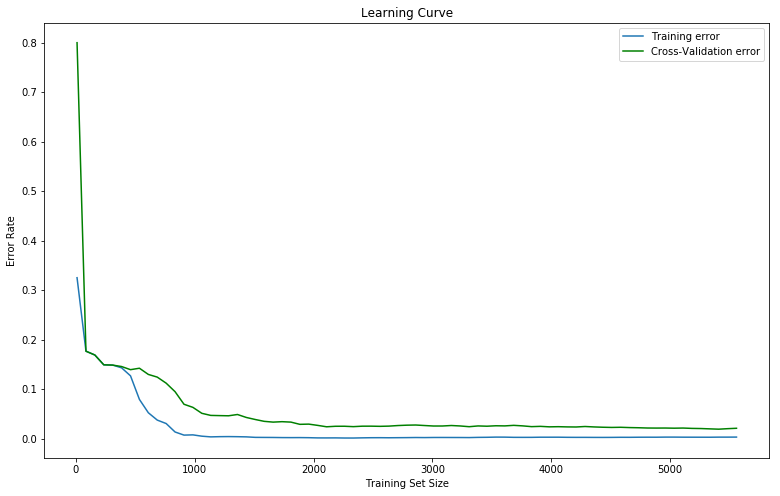

In [18]:

import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

def learning_curve(feature_vect, messages, folds):
    training_set_size = []
    train_error = []
    cv_error = []
    
    print("")
    print("This may take some time, please wait..", sep=' ', end='', flush=True)
    for training_size in range(10, len(messages), 75):
        print('.', sep=' ', end='', flush=True)
        X = feature_vect[:training_size]
        y = messages['label'][:training_size]
        kf = KFold(n_splits=folds, random_state=None, shuffle=False)
        err1 = []
        err2 = []

        # generate K folds and train classifier on every fold
        for train_index, test_index in kf.split(X):
            #print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            mnb = MultinomialNB(alpha = 0.10000000000000001)
            mnb.fit(X_train, y_train)
            pred = mnb.predict(X_test)

            err = 1.0 - (mnb.score(X_train,y_train))
            err1.append(err) # training error
            err = 1.0 - (mnb.score(X_test,y_test))
            err2.append(err) # cv error

        train_error.append(np.average(err1)) # training error =  avg of training error from every fold
        cv_error.append(np.average(err2))    # cross-validation error = avg of cv error from every fold
        training_set_size.append(training_size)

    # Plotting of learning curve using matplotlib
    x = training_set_size
    y = train_error
    z = cv_error

    fig = plt.figure(figsize=(13,8))
    plt.plot(x,y, label='Training error')
    plt.plot(x,z,'g-', label='Cross-Validation error')
    plt.xlabel('Training Set Size')
    plt.ylabel('Error Rate')
    plt.title('Learning Curve')
    plt.legend()
    plt.show(block = True)

def main():

    tfidf_vect = pickle.load(open("output/tfidf_vector.pickle", "rb"))
    messages = pd.read_csv('output/processed_msgs.csv')
    
    # append our message length feature to the tfidf vector to produce the final feature vector we fit into our classifiers
    len_feature = messages['length'].as_matrix()
    feat_vect = np.hstack((tfidf_vect.todense(), len_feature[:, None]))

    learning_curve(feat_vect, messages, folds = 5)
    #learning_curve(feat_vect, messages, folds = 10)

if __name__ == "__main__":
    main()

# Test learned classifier on 2nd Dataset to check for bias

In [19]:

import pickle
import numpy as np
import pandas as pd
from xml.dom import minidom
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, classification_report

def load_messages2():
    sms_list = []
    
    # parse spam.xml containing 2nd dataset
    xmldoc = minidom.parse('smsspamcollection/spam.xml')
    itemlist = xmldoc.getElementsByTagName('text')
    
    for msg in itemlist:
        sms_list.append(msg.childNodes[0].nodeValue)
    
    messages2 = pd.DataFrame(data=sms_list, columns=['message'])
    messages2['label'] = 'spam'
    messages2['length'] = messages2['message'].apply(len)
    return messages2

def Tfidf_Vectorization(sms_data):
    '''
    1. Convert word tokens from processed msgs dataframe into a bag of words
    2. Convert bag of words representation into tfidf vectorized representation for each message
    '''
    
    bow_transformer = CountVectorizer(analyzer=text_process).fit(sms_data['message'])
    bow = bow_transformer.transform(sms_data['message']) # bag of words

    tfidf_transformer = TfidfTransformer().fit(bow)
    tfidf_vect = tfidf_transformer.transform(bow) # tfidf vector representation
    
    return tfidf_vect

def main():
    
    messages = pd.read_csv("output/processed_msgs.csv")    
    messages2 = load_messages2()
    sms_data = pd.concat([messages, messages2]) # concatenate messages1 and messages2 to create a common tfidf feature vector
    
    tfidf_vect = Tfidf_Vectorization(sms_data) # create a large sparse tfidf feature vector
    
    # append our message length feature to the tfidf vector to produce the final feature vector we fit into our classifiers
    len_feature = sms_data['length'].as_matrix()
    feat_vect = np.hstack((tfidf_vect.todense(), len_feature[:, None]))
    
    X_train = feat_vect[:5572] # training set is comprised of entire UCI message dataset
    y_train = messages['label']
    X_test = feat_vect[5572:] # test set is comprised of entire Dublin spam message dataset
    y_test = messages2['label']
    
    #Multinomial Naive Bayes
    mnb = MultinomialNB(alpha = 0.10000000000000001)
    mnb.fit(X_train, y_train)
    pred = mnb.predict(X_test)
    
    print('\n################# Multinomial NB #################\n')
    print(classification_report(y_test, pred))
    print('\n')
    print(accuracy_score(y_test, pred))
    
    #SVM
    svm = SVC(kernel = 'linear', gamma = 1)
    svm.fit(X_train, y_train)
    pred = svm.predict(X_test)
    
    print('\n################# SVM #################\n')
    print(classification_report(y_test, pred))
    print('\n')
    print(accuracy_score(y_test, pred))
    
if __name__ == "__main__":
    main()


################# Multinomial NB #################

             precision    recall  f1-score   support

        ham       0.00      0.00      0.00         0
       spam       1.00      0.89      0.94      1353

avg / total       1.00      0.89      0.94      1353



0.888396156689


C:\Users\Rohan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



################# SVM #################

             precision    recall  f1-score   support

        ham       0.00      0.00      0.00         0
       spam       1.00      0.84      0.91      1353

avg / total       1.00      0.84      0.91      1353



0.835181079084


# Address Imbalance of UCI Dataset

In [20]:

import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, classification_report

def Generate_balanced_dataset(messages):
    '''
    generate a more balanced dataset containing 1000 ham and 747 spam messages
    '''
    ham_msg = messages[messages['label'] == 'ham'] # ham messages
    spam_msg = messages[messages['label'] == 'spam'] # spam messages
    
    ham_msg = ham_msg.reset_index(drop=True)[:1000] # pick only top 1000 ham messages
    spam_msg = spam_msg.reset_index(drop=True) # pick all 747 spam messages
    
    balanced_data = pd.concat([ham_msg, spam_msg]).sample(frac=1).reset_index(drop=True) # concatenate spam and ham messages to create a more balanced dataset
    
    return balanced_data

def Tfidf_Vectorization(sms_data):
    '''
    1. Convert word tokens from processed msgs dataframe into a bag of words
    2. Convert bag of words representation into tfidf vectorized representation for each message
    '''
    
    bow_transformer = CountVectorizer(analyzer=text_process).fit(sms_data['message'])
    bow = bow_transformer.transform(sms_data['message']) # bag of words

    tfidf_transformer = TfidfTransformer().fit(bow)
    tfidf_vect = tfidf_transformer.transform(bow) # tfidf vector representation
    
    return tfidf_vect

def main():
    
    messages = pd.read_csv("output/processed_msgs.csv")
    
    balanced_data = Generate_balanced_dataset(messages)
    tfidf_vect = Tfidf_Vectorization(balanced_data)
    
    # append our message length feature to the tfidf vector to produce the final feature vector we fit into our classifiers
    len_feature = balanced_data['length'].as_matrix()
    feat_vect = np.hstack((tfidf_vect.todense(), len_feature[:, None]))
    
    X_train, X_test, y_train, y_test = train_test_split(feat_vect, balanced_data['label'], test_size=0.3, random_state=101)
    
    #Multinomial Naive Bayes
    mnb = MultinomialNB(alpha = 0.10000000000000001)
    mnb.fit(X_train, y_train)
    pred = mnb.predict(X_test)
    
    print('\n################# Multinomial NB #################\n')
    print(classification_report(y_test, pred))
    print('\n')
    print(accuracy_score(y_test, pred))
    
    #SVM
    svm = SVC(kernel = 'linear', gamma = 1)
    svm.fit(X_train, y_train)
    pred = svm.predict(X_test)
    
    print('\n################# SVM #################\n')
    print(classification_report(y_test, pred))
    print('\n')
    print(accuracy_score(y_test, pred))
    
if __name__ == "__main__":
    main()


################# Multinomial NB #################

             precision    recall  f1-score   support

        ham       0.94      0.98      0.96       300
       spam       0.97      0.92      0.94       225

avg / total       0.95      0.95      0.95       525



0.950476190476

################# SVM #################

             precision    recall  f1-score   support

        ham       0.95      0.96      0.95       300
       spam       0.95      0.93      0.94       225

avg / total       0.95      0.95      0.95       525



0.946666666667
